# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.119364e+01     6.642476e+00
 * time: 0.0042569637298583984
     1     2.902499e+01     4.405571e+00
 * time: 0.019215822219848633
     2     2.024431e+01     4.787652e+00
 * time: 0.036900997161865234
     3     1.381971e+01     3.243441e+00
 * time: 0.05427098274230957
     4     1.366835e+01     5.007676e+00
 * time: 0.06836891174316406
     5     1.118111e+01     2.219855e+00
 * time: 0.08599090576171875
     6     1.010147e+01     2.883053e+00
 * time: 0.10018277168273926
     7     9.263651e+00     1.832589e+00
 * time: 0.11430191993713379
     8     8.819902e+00     1.110196e+00
 * time: 0.12873196601867676
     9     8.624730e+00     1.143559e+00
 * time: 0.1435089111328125
    10     8.583597e+00     1.163789e+00
 * time: 0.1548619270324707
    11     8.490955e+00     8.009639e-01
 * time: 0.16964292526245117
    12     8.338028e+00     5.637027e-01
 * time: 0.18471384048461914
    13     8.298190e+00     8.652605e-01
 * tim

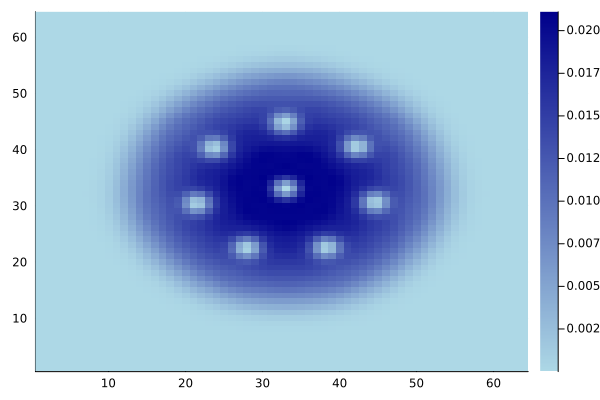

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)